<a href="https://colab.research.google.com/github/mahmoudBidry/Finetune-Google-Paligemma-3B-VQA/blob/main/finetuned_Paligemma_VQAMed_2019_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fine-tuned PaliGemma Inference

---



In this notebook, we will demonstrate how to perform inference with a PaliGemma fine-tuned model using the 🤗 Transformers library.

Ensure you have the latest version of the Transformers library installed.

Here's the model link on Hugging Face: [PaliGemma_VQAMED2019](https://huggingface.co/MahmoudRox/Paligemma_VQAMED2019)

# Requirements

Make sure to activate the high-RAM for a proper execution.

In [ ]:
!pip install -qU git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install -qU peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 77.0 MB/s eta 0:00:00


Let's log in to Hugging Face.

To get a READ access token, visit this link on your profile: https://huggingface.co/settings/tokens

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

Let's load the model.

Make sure you have access to "google/paligemma-3b-pt-224" (agree to the terms of services).

In [ ]:
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration

processor = AutoProcessor.from_pretrained("google/paligemma-3b-pt-224")
model = PaliGemmaForConditionalGeneration.from_pretrained("MahmoudRox/Paligemma_VQAMED2019")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.26M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

adapter_config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/62.6k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/45.3M [00:00<?, ?B/s]

Now, let's load our image.

Note: The fine-tuned model supports only JPG extensions.

In [ ]:
from PIL import Image
import requests

prompt = "Which part of the body is in the picture?" #your question
image_file = "https://prod-images-static.radiopaedia.org/images/9289883/1c20962e46c92ee83a3f551adb24fa_big_gallery.jpg" #your image
raw_image = Image.open(requests.get(image_file, stream=True).raw)

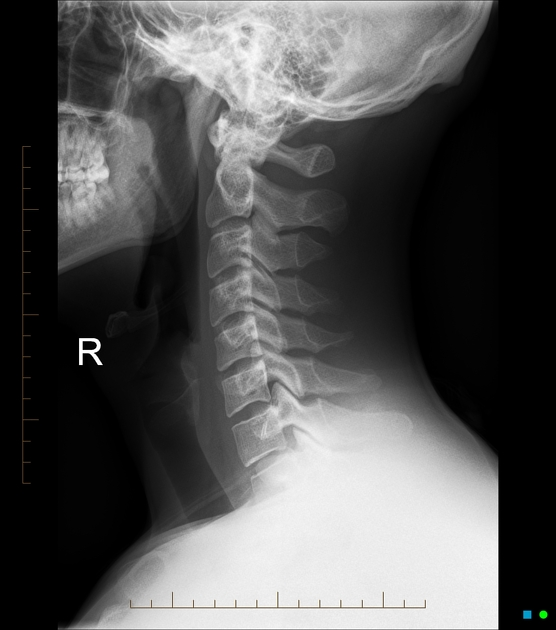

In [ ]:
raw_image

Let's create a function to generate the model's response.

In [ ]:
import torch


def generate_response(prompt, image):
  inputs = processor(images=image, text=prompt, return_tensors="pt")

  # Check if the attention mask needs to be inverted
  attention_mask = inputs['attention_mask']
  if torch.max(attention_mask) == 1:
      attention_mask = 1 - attention_mask

  # Generate a response
  outputs = model.generate(
      input_ids=inputs['input_ids'],
      attention_mask=attention_mask,
      pixel_values=inputs['pixel_values'],
      max_new_tokens=1,
      no_repeat_ngram_size=2
  )

  # Decode and print the response
  decoded_response = processor.decode(outputs[0], skip_special_tokens=True)[len(prompt):]
  return decoded_response

In [ ]:
print(generate_response(prompt, raw_image))


spine
